## First download all of the necessary data

---

Press "Shift + Enter" to run each cell sequentially. Alternatively, you can press "Cmd/Ctrl + F9" to run all cells and then scroll down to bottom cell.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Download Pre-requisites needed for running the e2e model
%cd /content/

%mkdir model_data
!wget -O /content/model_data/answers_vqa.txt https://dl.fbaipublicfiles.com/pythia/data/answers_vqa.txt
!wget -O /content/model_data/vocabulary_100k.txt https://dl.fbaipublicfiles.com/pythia/data/vocabulary_100k.txt
!wget -O /content/model_data/detectron_model.pth  https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.pth 
!wget -O /content/model_data/pythia.pth https://dl.fbaipublicfiles.com/pythia/pretrained_models/vqa2/pythia_train_val.pth
!wget -O /content/model_data/pythia.yaml https://dl.fbaipublicfiles.com/pythia/pretrained_models/vqa2/pythia_train_val.yml
!wget -O /content/model_data/detectron_model.yaml https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.yaml
!wget -O /content/model_data/detectron_weights.tar.gz https://dl.fbaipublicfiles.com/pythia/data/detectron_weights.tar.gz
!tar xf /content/model_data/detectron_weights.tar.gz

/content
--2020-05-17 21:07:04--  https://dl.fbaipublicfiles.com/pythia/data/answers_vqa.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24768 (24K) [text/plain]
Saving to: ‘/content/model_data/answers_vqa.txt’

/content/model_data 100%[===================>]  24.19K  --.-KB/s    in 0.08s   

2020-05-17 21:07:05 (305 KB/s) - ‘/content/model_data/answers_vqa.txt’ saved [24768/24768]

--2020-05-17 21:07:06--  https://dl.fbaipublicfiles.com/pythia/data/vocabulary_100k.txt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 2606:4700:10::6816:4b8e, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 626738 (612K) [text/plain]
Savi

## Now, install some particular dependencies

In [0]:
# Install dependencies
!pip install ninja yacs cython matplotlib demjson
!pip install git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 133kB 9.0MB/s 
  Created wheel for demjson: filename=demjson-2.2.4-cp36-none-any.whl size=73547 sha256=7eee8aabdf4629a75eb83baa108e005b47064eb128f112c803edfc7e3976b700
  Stored in directory: /root/.cache/pip/wheels/c5/d2/ab/a54fb5ea53ac3badba098160e8452fa126a51febda80440ded
Successfully built demjson
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-5hlqvjvv
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-5hlqvjvv
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275260 sha256=492bfbf8285513170adf18a116b645c2d8399826bfbde1f76fea66e8995fbf29
  Stored in directory: /tmp/pip-ephem-wheel-cache-2933imdd/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools


## Install fastText for installing Pythia

In [0]:
%cd /content/
%rm -rf fastText
!git clone https://github.com/facebookresearch/fastText.git fastText
%cd /content/fastText
!pip install -e .

/content
Cloning into 'fastText'...
remote: Enumerating objects: 3826, done.
remote: Total 3826 (delta 0), reused 0 (delta 0), pack-reused 3826
Receiving objects: 100% (3826/3826), 8.20 MiB | 28.55 MiB/s, done.
Resolving deltas: 100% (2409/2409), done.
/content/fastText
Obtaining file:///content/fastText
  Running setup.py develop for fasttext


In [0]:
!git clone --branch v0.3.1 https://github.com/facebookresearch/mmf pythia

Cloning into 'pythia'...
remote: Enumerating objects: 8305, done.
remote: Total 8305 (delta 0), reused 0 (delta 0), pack-reused 8305
Receiving objects: 100% (8305/8305), 7.39 MiB | 19.56 MiB/s, done.
Resolving deltas: 100% (5373/5373), done.
Note: checking out '2df9160c6daa84830973a12a41f9109bc25e498d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



## Install Pythia now

In [0]:
%cd /content/
%rm -rf pythia
!git clone --branch v0.3.1 https://github.com/facebookresearch/mmf pythia
%cd /content/pythia
# Don't modify torch version
!sed -i '/torch/d' requirements.txt
!pip install -e .
import sys
sys.path.append('/content/pythia')

/content
Cloning into 'pythia'...
remote: Enumerating objects: 8305, done.
remote: Total 8305 (delta 0), reused 0 (delta 0), pack-reused 8305
Receiving objects: 100% (8305/8305), 7.39 MiB | 14.64 MiB/s, done.
Resolving deltas: 100% (5373/5373), done.
Note: checking out '2df9160c6daa84830973a12a41f9109bc25e498d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

/content/pythia
Obtaining file:///content/pythia
     |████████████████████████████████| 51kB 1.9MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 460kB 22.4MB/s 
     |████████████████████████████████| 194kB 50.4MB/s 
     |███████

## Install maskrcnn-benchmark now

In [0]:
# Install maskrcnn-benchmark to extract detectron features
%cd /content
!git clone https://gitlab.com/meetshah1995/vqa-maskrcnn-benchmark.git
%cd /content/vqa-maskrcnn-benchmark
# Compile custom layers and build mask-rcnn backbone
!python setup.py build
!python setup.py develop
sys.path.append('/content/vqa-maskrcnn-benchmark')

/content
Cloning into 'vqa-maskrcnn-benchmark'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 730 (delta 110), reused 99 (delta 99), pack-reused 602
Receiving objects: 100% (730/730), 3.76 MiB | 30.07 MiB/s, done.
Resolving deltas: 100% (397/397), done.
/content/vqa-maskrcnn-benchmark
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.6
creating build/lib.linux-x86_64-3.6/maskrcnn_benchmark
copying maskrcnn_benchmark/__init__.py -> build/lib.linux-x86_64-3.6/maskrcnn_benchmark
creating build/lib.linux-x86_64-3.6/maskrcnn_benchmark/modeling
copying maskrcnn_benchmark/modeling/matcher.py -> build/lib.linux-x86_64-3.6/maskrcnn_benchmark/modeling
copying maskrcnn_benchmark/modeling/balanced_positive_negative_sampler.py -> build/lib.linux-x86_64-3.6/maskrcnn_benchmark/modeling
copying maskrcnn_benchmark/modeling/box_coder.py -> build/lib.linux-x86_64-3.6/ma

## Demo

The class handles everything from feature extraction, token extraction and predicting the answer

In [0]:
%cd /content/
import yaml
import cv2
import torch
import requests
import numpy as np
import gc
import torch.nn.functional as F
import pandas as pd


import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
from IPython.display import display, HTML, clear_output
from ipywidgets import widgets, Layout
from io import BytesIO


from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.layers import nms
from maskrcnn_benchmark.modeling.detector import build_detection_model
from maskrcnn_benchmark.structures.image_list import to_image_list
from maskrcnn_benchmark.utils.model_serialization import load_state_dict


from pythia.utils.configuration import ConfigNode
from pythia.tasks.processors import VocabProcessor, VQAAnswerProcessor
from pythia.models.pythia import Pythia
from pythia.common.registry import registry
from pythia.common.sample import Sample, SampleList


class PythiaDemo:
  TARGET_IMAGE_SIZE = [448, 448]
  CHANNEL_MEAN = [0.485, 0.456, 0.406]
  CHANNEL_STD = [0.229, 0.224, 0.225]
  
  def __init__(self):
    self._init_processors()
    self.pythia_model = self._build_pythia_model()
    self.detection_model = self._build_detection_model()
    self.resnet_model = self._build_resnet_model()
    
  def _init_processors(self):
    with open("/content/model_data/pythia.yaml") as f:
      config = yaml.load(f)
    
    config = ConfigNode(config)
    # Remove warning
    config.training_parameters.evalai_inference = True
    registry.register("config", config)
    
    self.config = config
    
    vqa_config = config.task_attributes.vqa.dataset_attributes.vqa2
    text_processor_config = vqa_config.processors.text_processor
    answer_processor_config = vqa_config.processors.answer_processor
    
    text_processor_config.params.vocab.vocab_file = "/content/model_data/vocabulary_100k.txt"
    answer_processor_config.params.vocab_file = "/content/model_data/answers_vqa.txt"
    # Add preprocessor as that will needed when we are getting questions from user
    self.text_processor = VocabProcessor(text_processor_config.params)
    self.answer_processor = VQAAnswerProcessor(answer_processor_config.params)

    registry.register("vqa2_text_processor", self.text_processor)
    registry.register("vqa2_answer_processor", self.answer_processor)
    registry.register("vqa2_num_final_outputs", 
                      self.answer_processor.get_vocab_size())
    
  def _build_pythia_model(self):
    state_dict = torch.load('/content/model_data/pythia.pth')
    model_config = self.config.model_attributes.pythia
    model_config.model_data_dir = "/content/"
    model = Pythia(model_config)
    model.build()
    model.init_losses_and_metrics()
    
    if list(state_dict.keys())[0].startswith('module') and \
       not hasattr(model, 'module'):
      state_dict = self._multi_gpu_state_to_single(state_dict)
          
    model.load_state_dict(state_dict)
    model.to("cuda")
    model.eval()
    
    return model
  
  def _build_resnet_model(self):
    self.data_transforms = transforms.Compose([
        transforms.Resize(self.TARGET_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Normalize(self.CHANNEL_MEAN, self.CHANNEL_STD),
    ])
    resnet152 = models.resnet152(pretrained=True)
    resnet152.eval()
    modules = list(resnet152.children())[:-2]
    self.resnet152_model = torch.nn.Sequential(*modules)
    self.resnet152_model.to("cuda")
  
  def _multi_gpu_state_to_single(self, state_dict):
    new_sd = {}
    for k, v in state_dict.items():
        if not k.startswith('module.'):
            raise TypeError("Not a multiple GPU state of dict")
        k1 = k[7:]
        new_sd[k1] = v
    return new_sd
  
  def predict(self, url, question):
    with torch.no_grad():
      detectron_features = self.get_detectron_features(url)
      return detectron_features
      resnet_features = self.get_resnet_features(url)

      sample = Sample()

      processed_text = self.text_processor({"text": question})
      sample.text = processed_text["text"]
      sample.text_len = len(processed_text["tokens"])
      sample.image_feature_0 = detectron_features
      sample.image_info_0 = Sample({
          "max_features": torch.tensor(100, dtype=torch.long)
      })

      sample.image_feature_1 = resnet_features

      sample_list = SampleList([sample])
      sample_list = sample_list.to("cuda")

      scores = self.pythia_model(sample_list)["scores"]
      scores = torch.nn.functional.softmax(scores, dim=1)
      actual, indices = scores.topk(5, dim=1)

      top_indices = indices[0]
      top_scores = actual[0]

      probs = []
      answers = []

      for idx, score in enumerate(top_scores):
        probs.append(score.item())
        answers.append(
            self.answer_processor.idx2word(top_indices[idx].item())
        )
    
    gc.collect()
    torch.cuda.empty_cache()
    
    return probs, answers
    
  
  def _build_detection_model(self):

      cfg.merge_from_file('/content/model_data/detectron_model.yaml')
      cfg.freeze()

      model = build_detection_model(cfg)
      checkpoint = torch.load('/content/model_data/detectron_model.pth', 
                              map_location=torch.device("cpu"))

      load_state_dict(model, checkpoint.pop("model"))

      model.to("cuda")
      model.eval()
      return model
  
  def get_actual_image(self, image_path):
      if image_path.startswith('http'):
          path = requests.get(image_path, stream=True).raw
      else:
          path = image_path
      
      return path

  def _image_transform(self, image_path):
      path = self.get_actual_image(image_path)

      img = Image.open(path).convert('RGB')
      im = np.array(img).astype(np.float32)
      im = im[:, :, ::-1]
      im -= np.array([102.9801, 115.9465, 122.7717])
      im_shape = im.shape
      im_size_min = np.min(im_shape[0:2])
      im_size_max = np.max(im_shape[0:2])
      im_scale = float(800) / float(im_size_min)
      # Prevent the biggest axis from being more than max_size
      if np.round(im_scale * im_size_max) > 1333:
           im_scale = float(1333) / float(im_size_max)
      im = cv2.resize(
           im,
           None,
           None,
           fx=im_scale,
           fy=im_scale,
           interpolation=cv2.INTER_LINEAR
       )
      img = torch.from_numpy(im).permute(2, 0, 1)
      return img, im_scale


  def _process_feature_extraction(self, output,
                                 im_scales,
                                 feat_name='fc6',
                                 conf_thresh=0.2):
      batch_size = len(output[0]["proposals"])
      n_boxes_per_image = [len(_) for _ in output[0]["proposals"]]
      score_list = output[0]["scores"].split(n_boxes_per_image)
      score_list = [torch.nn.functional.softmax(x, -1) for x in score_list]
      feats = output[0][feat_name].split(n_boxes_per_image)
      cur_device = score_list[0].device

      feat_list = []

      for i in range(batch_size):
          dets = output[0]["proposals"][i].bbox / im_scales[i]
          scores = score_list[i]

          max_conf = torch.zeros((scores.shape[0])).to(cur_device)

          for cls_ind in range(1, scores.shape[1]):
              cls_scores = scores[:, cls_ind]
              keep = nms(dets, cls_scores, 0.5)
              max_conf[keep] = torch.where(cls_scores[keep] > max_conf[keep],
                                           cls_scores[keep],
                                           max_conf[keep])

          keep_boxes = torch.argsort(max_conf, descending=True)[:100]
          feat_list.append((feats[i][keep_boxes], dets[keep_boxes]))
      return feat_list

  def masked_unk_softmax(self, x, dim, mask_idx):
      x1 = F.softmax(x, dim=dim)
      x1[:, mask_idx] = 0
      x1_sum = torch.sum(x1, dim=1, keepdim=True)
      y = x1 / x1_sum
      return y
   
  def get_resnet_features(self, image_path):
      path = self.get_actual_image(image_path)
      img = Image.open(path).convert("RGB")
      img_transform = self.data_transforms(img)
      
      if img_transform.shape[0] == 1:
        img_transform = img_transform.expand(3, -1, -1)
      img_transform = img_transform.unsqueeze(0).to("cuda")
      
      features = self.resnet152_model(img_transform).permute(0, 2, 3, 1)
      features = features.view(196, 2048)
      return features
    
  def get_detectron_features(self, image_path):
      im, im_scale = self._image_transform(image_path)
      img_tensor, im_scales = [im], [im_scale]
      current_img_list = to_image_list(img_tensor, size_divisible=32)
      current_img_list = current_img_list.to('cuda')
      with torch.no_grad():
          output = self.detection_model(current_img_list)
      feat_list = self._process_feature_extraction(output, im_scales, 
                                                  'fc6', 0.2)
      return feat_list[0]
    

/content


### If the command below fails with 'CUDNN_EXECUTION_FAILED', try rerunning the cell

In [0]:
demo = PythiaDemo()

/content/pythia/pythia/.vector_cache/glove.6B.zip: 862MB [06:27, 2.22MB/s]                           
100%|█████████▉| 399735/400000 [00:48<00:00, 11327.40it/s]Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth

  0%|          | 0.00/230M [00:00<?, ?B/s]
  0%|          | 960k/230M [00:00<00:30, 7.97MB/s]
  1%|          | 2.25M/230M [00:00<00:26, 8.97MB/s]
  2%|▏         | 3.56M/230M [00:00<00:24, 9.67MB/s]
  2%|▏         | 5.31M/230M [00:00<00:22, 10.7MB/s]
  3%|▎         | 6.25M/230M [00:00<00:23, 9.79MB/s]
  4%|▎         | 8.06M/230M [00:00<00:21, 10.7MB/s]
  4%|▍         | 9.07M/230M [00:00<00:29, 7.87MB/s]
  5%|▍         | 10.4M/230M [00:01<00:26, 8.82MB/s]
  5%|▍         | 11.4M/230M [00:01<00:26, 8.82MB/s]
  6%|▌         | 13.2M/230M [00:01<00:21, 10.5MB/s]
  6%|▋         | 14.4M/230M [00:01<00:22, 10.2MB/s]
  7%|▋         | 15.5M/230M [00:01<00:21, 10.4MB/s]
  8%|▊         | 18.1M/230M [00:01<00:17, 

In [0]:
!wget http://images.cocodataset.org/zips/train2014.zip

--2020-05-17 21:20:42--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.166.43
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.166.43|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  42.2MB/s    in 5m 12s  

2020-05-17 21:25:55 (41.3 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]



In [0]:
!unzip train2014.zip &> /dev/null

In [0]:
!rm train2014.zip

In [0]:
import os
img_path_list = []
for entry in os.listdir('/content/train2014/'):
    if os.path.isfile(os.path.join('/content/train2014/', entry)):
        img_path_list.append(os.path.join('/content/train2014/', entry))

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import os 

os.makedirs('/content/train2014_boxes_1/')

In [0]:
from tqdm import tqdm
import numpy as np
from IPython.display import clear_output

for i, img_path in enumerate(tqdm(img_path_list[:15000])):
    if i % 10:
        clear_output(True)
    scores = demo.predict(img_path, 123)
    np.savez_compressed('/content/train2014_boxes_1/' + img_path.split('/')[-1] + '.npz', x=scores[0].cpu().numpy(), boxes = scores[1].cpu().numpy())


100%|██████████| 15000/15000 [5:08:06<00:00,  1.23s/it]


In [0]:
!rm -r train2014

In [0]:
!zip -r train2014_boxes_1.zip train2014_boxes_1

Streaming output truncated to the last 5000 lines.
  adding: train2014_boxes_1/COCO_train2014_000000370763.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000194653.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000043431.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000482734.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000185591.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000576026.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000468085.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000395340.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000248565.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000117366.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000568531.jpg.npz (deflated 0%)
  adding: train2014_boxes_1/COCO_train2014_000000024433.jpg.npz (deflated 0%)
  adding: tra

In [0]:
!cp train2014_boxes_1.zip '/content/drive/My Drive/'

## Use the text fields below to ask a question on an image

Image URL can be any http/https URL. We show top 5 predictions from Pythia. Confidence shows how confident Pythia model was about a particular prediction.

In [0]:
def init_widgets(url, question):
  image_text = widgets.Text(
    description="Image URL", layout=Layout(minwidth="70%")
  )
  question_text = widgets.Text(
      description="Question", layout=Layout(minwidth="70%")
  )

  image_text.value = url
  question_text.value = question
  submit_button = widgets.Button(description="Ask Pythia!")

  display(image_text)
  display(question_text)
  display(submit_button)

  submit_button.on_click(lambda b: on_button_click(
      b, image_text, question_text
  ))
  
  return image_text, question_text
  
def on_button_click(b, image_text, question_text):
  clear_output()
  image_path = demo.get_actual_image(image_text.value)
  image = Image.open(image_path)
  
  print(demo.predict(image_text.value, question_text.value)[0].shape, demo.predict(image_text.value, question_text.value)[1].shape)
  np.savez_compressed('123.npz', a=demo.predict(image_text.value, question_text.value)[0].cpu().numpy(), b=demo.predict(image_text.value, question_text.value)[1].cpu().numpy())
  scores = [score * 100 for score in scores]
  df = pd.DataFrame({
      "Prediction": predictions,
      "Confidence": scores
  })
  
  init_widgets(image_text.value, question_text.value)
  display(image)
  
  display(HTML(df.to_html()))
 

image_text, question_text = init_widgets(
    "http://images.cocodataset.org/train2017/000000505539.jpg", 
    "where is this place?"
)


torch.Size([100, 2048]) torch.Size([100, 4])


UnboundLocalError: ignored

In [0]:
np.load('123.npz')['b']

array([[374.8815    , 164.5788    , 461.31888   , 369.90112   ],
       [354.73105   , 128.16998   , 444.83536   , 322.19537   ],
       [382.3948    , 165.4225    , 434.47476   , 316.87958   ],
       [  0.        ,   0.        , 652.2       , 205.7372    ],
       [105.66881   , 239.38913   , 260.75333   , 369.19818   ],
       [375.99878   , 207.45436   , 424.221     , 359.87912   ],
       [ 98.21928   , 267.8568    , 221.13838   , 352.4604    ],
       [133.7605    , 276.6388    , 652.2       , 472.21603   ],
       [314.3832    , 186.6642    , 451.53622   , 359.1393    ],
       [408.76096   , 161.09193   , 441.39557   , 197.5441    ],
       [405.0052    , 186.52522   , 417.69455   , 232.7639    ],
       [  0.        , 306.39368   , 472.6307    , 479.40002   ],
       [131.61147   , 283.5816    , 253.29298   , 361.4628    ],
       [ 51.0142    , 213.1358    , 186.57098   , 297.92596   ],
       [ 81.61152   , 375.16772   , 618.76196   , 479.40002   ],
       [ 24.963383  , 245

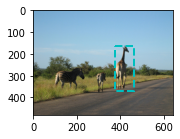

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[5.5, 2.8])
ax = fig.add_subplot(121)
image_path = demo.get_actual_image('http://images.cocodataset.org/train2017/000000505539.jpg')
image = Image.open(image_path)
ax.imshow(image)
ax.add_patch(plt.Rectangle((374.8815    , 164.5788)    , 461.31888 - 374.8815   , 369.90112 - 164.5788, ls="--", lw=2, ec="c", fc="None"))

In [0]:
np.array(image)

array([[[120, 163, 197],
        [119, 162, 196],
        [117, 161, 196],
        ...,
        [113, 165, 205],
        [114, 166, 206],
        [116, 168, 208]],

       [[117, 163, 196],
        [117, 163, 197],
        [115, 164, 197],
        ...,
        [115, 167, 207],
        [116, 168, 208],
        [118, 170, 210]],

       [[115, 163, 199],
        [114, 164, 199],
        [112, 165, 199],
        ...,
        [115, 167, 207],
        [116, 168, 208],
        [117, 169, 209]],

       ...,

       [[ 90,  84,  70],
        [ 83,  75,  62],
        [ 78,  70,  57],
        ...,
        [ 88,  82,  70],
        [ 88,  82,  70],
        [ 91,  85,  73]],

       [[ 88,  80,  67],
        [ 87,  79,  66],
        [ 86,  76,  64],
        ...,
        [ 84,  77,  67],
        [ 84,  77,  67],
        [ 87,  80,  70]],

       [[ 89,  80,  65],
        [ 89,  80,  65],
        [ 90,  81,  66],
        ...,
        [ 83,  76,  66],
        [ 81,  74,  64],
        [ 82,  75,  65]]